In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import urllib.parse
import os
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [45]:
df = pd.read_sql_query('''SELECT * FROM jaildata.stays_summary;''', cnx)
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi,flag,not_primary_custodian
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,1,0,0,0
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,0,2,1,0,0,0,0
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,1,0,0,0
3,39793,"KARRICK, LUKE MICHAEL",M,W,2022-03-15,2022-03-19,5.0,0,0,0,0,0,0,1
4,41422,"HERNANDEZ, ERMENEGILDO ESPINOZA",M,W,2022-03-19,2022-03-22,4.0,0,1,0,0,0,0,1


In [46]:
df

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi,flag,not_primary_custodian
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,1,0,0,0
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,0,2,1,0,0,0,0
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,1,0,0,0
3,39793,"KARRICK, LUKE MICHAEL",M,W,2022-03-15,2022-03-19,5.0,0,0,0,0,0,0,1
4,41422,"HERNANDEZ, ERMENEGILDO ESPINOZA",M,W,2022-03-19,2022-03-22,4.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,8316,"BLACK, MICHAEL ANTHONY",M,W,2022-01-04,2022-01-27,24.0,0,0,1,0,0,0,0
890,20296,"WEEKS, JERRY ALLEN",M,W,2022-01-29,2022-02-10,13.0,3,3,0,0,0,0,0
891,27540,"DAVIS, LOGAN WILLIAM",M,W,2022-02-15,2022-02-18,4.0,1,3,0,0,0,0,0
892,31200,"KELLER, TIMOTHY SKYLER",M,W,2022-02-23,2022-02-23,1.0,3,3,0,0,0,0,0


In [47]:
df.groupby(['race', 'gender']).size()

race  gender
A     F           2
      M           3
B     F          27
      M         128
I     F           2
      M           6
U     M           1
W     F         168
      M         557
dtype: int64

In [48]:
(13+87+1)/(13+87+56+291+2)

0.22494432071269488

In [6]:
13/(56+13)

0.18840579710144928

In [7]:
87/(87+291)

0.23015873015873015

Women make up 22% of the dataset; Black women make up 19% of their race group, white women make up 23% of their race group.

In [8]:
291/(13+87+56+291+2)

0.6481069042316259

## Entire Population Distribution

[Text(0.5, 0, 'Number of days in jail'),
 Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 1.0, 'Entire Population')]

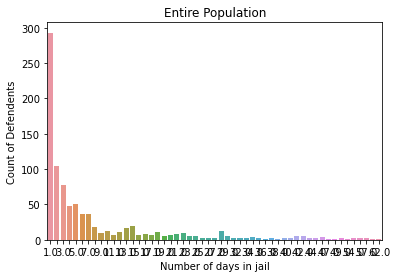

In [49]:
ax = sns.countplot(x='days', data=df)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents',  title='Entire Population')


Below, I'm plotting the distributions of different groups, just to see if anything stands out.

## Female Population Distribution

In [50]:
dfFemale = df[df['gender']=='F']
dfMale = df[df['gender']=='M']

[Text(0.5, 0, 'Number of days in jail'),
 Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 1.0, 'Female Population')]

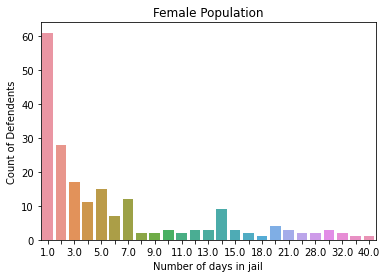

In [51]:
ax = sns.countplot(x='days', data=dfFemale)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents', title='Female Population')


## Male Population Distribution

[Text(0.5, 0, 'Number of days in jail'),
 Text(0, 0.5, 'Count of Defendents'),
 Text(0.5, 1.0, 'Male Population')]

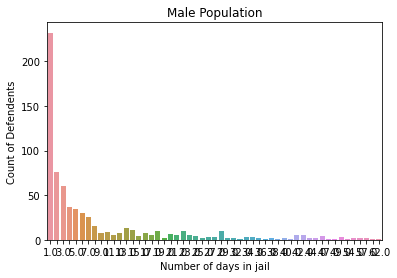

In [52]:
ax = sns.countplot(x='days', data=dfMale)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents',  title='Male Population')


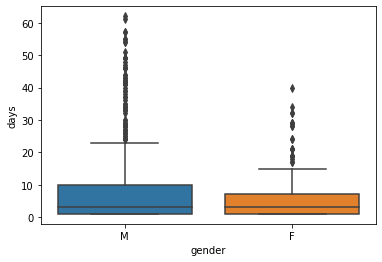

In [53]:
ax = sns.boxplot(x="gender", y="days", data=df)

## White Population Distribution

In [54]:
df['race'].unique()

array(['W', 'B', 'U', 'I', 'A'], dtype=object)

In [39]:
dfWhite = df[df['race']=='W']
dfBlack = df[df['race']=='B']

[Text(0.5, 0, 'Number of days in jail'), Text(0, 0.5, 'Count of Defendents')]

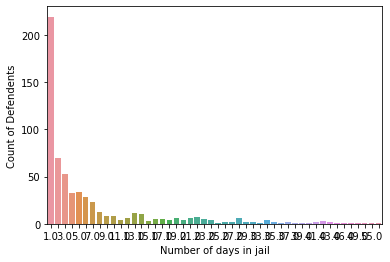

In [55]:
ax = sns.countplot(x='days', data=dfWhite)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents')


## Black Population Distribution

[Text(0.5, 0, 'Number of days in jail'), Text(0, 0.5, 'Count of Defendents')]

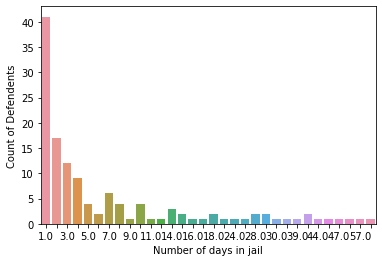

In [56]:
ax = sns.countplot(x='days', data=dfBlack)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
ax.set(xlabel='Number of days in jail', ylabel='Count of Defendents')


## Box and Whisker

In [57]:
dfBW = df[(df['race']=='W') | (df['race']=='B')]
dfIA = df[(df['race']=='I') | (df['race']=='A')]

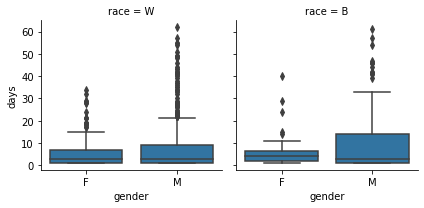

In [58]:
g = sns.FacetGrid(dfBW, col="race")
g.map(sns.boxplot,'gender',  "days", order=["F", "M"])

In [19]:
dfIA.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
321,33732,"DEWOLFE, TIMOTHY PARK",M,A,2022-03-01,2022-03-01,1.0,1,2,0,None,None
323,20044,"GLOSSER, CARMEN LICY",F,A,2022-01-29,2022-01-30,2.0,2,2,0,None,None
486,25914,"MERZLAK, THOMAS JOHN",M,I,2022-02-11,2022-02-17,7.0,1,4,0,None,None
530,22546,"YANG, PHIA",M,A,2022-02-04,2022-02-04,1.0,1,5,0,None,None
556,15498,"HUSKEY, WILLIAM CHARLES",M,I,2022-01-20,2022-02-21,33.0,-1,-1,1,None,None


Only 3 people are not Black or white, so I'm unable make graphs of the other race groups.

## Other (in progress)

In [20]:
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,None,None
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,-1,2,0,None,None
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,None,None
3,23591,"HARDIN, JOSEPH CHRISTIAN",M,W,2022-02-06,2022-02-24,19.0,-1,-1,1,None,None
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18.0,-1,-1,1,None,None


In [21]:
df['min_level'].unique()

array([-3, -1, 11,  6,  1,  2,  5,  3,  4,  9])

In [23]:
df['max_level'].unique()

array([-1,  2, 12,  4,  6,  1,  5,  3,  7, -3,  8, 11,  9, 10])

In [24]:
df['has_violation'].unique()

array([1, 0])

In [25]:
df.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,12525,"PHILLIPS, TIFFANY ANN",F,W,2022-01-13,2022-01-13,1,-1,-1,1,NaN,NaN
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5,-1,2,0,NaN,NaN
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3,11,12,0,NaN,NaN
3,19278,"HODGES, RICHARD SCOTT",M,W,2022-01-28,2022-01-29,2,2,4,0,NaN,NaN
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18,-1,-1,1,NaN,NaN


In [22]:
dfExploded = df.explode(['race', 'gender'])
dfExploded.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,None,None
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,-1,2,0,None,None
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,None,None
3,23591,"HARDIN, JOSEPH CHRISTIAN",M,W,2022-02-06,2022-02-24,19.0,-1,-1,1,None,None
4,9808,"LOOPER, REGINALD ALAN",M,B,2022-01-07,2022-01-24,18.0,-1,-1,1,None,None


I was going to look into correlations between race/gender/max_level/has_violation, but I need to go read up on some stats first

## White males

In [23]:
dfWM = df[(df['race']=='W') & (df['gender']=='M')]

In [24]:
dfWM.head()

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,None,None
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,-1,2,0,None,None
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,None,None
3,23591,"HARDIN, JOSEPH CHRISTIAN",M,W,2022-02-06,2022-02-24,19.0,-1,-1,1,None,None
5,11805,"BURRELL, BRYON MATTHEW",M,W,2022-01-12,2022-03-01,49.0,-1,-1,0,None,None


idea- take a look at level/has_violation distributions